In [7]:
import pandas as pd
import numpy as np
import os
print(os.environ['IEX_TOKEN'])

pk_2f841cbff2d6422ab0145ada59fa5d34


In [1025]:
up_counts = df['up_streaks'].value_counts(normalize=True)
down_counts = df['down_streaks'].value_counts(normalize=True)
up_counts

0   0.458
1   0.247
2   0.130
3   0.078
4   0.038
5   0.024
6   0.012
7   0.006
9   0.004
8   0.004
Name: up_streaks, dtype: float64

In [794]:
def pos_streaker(x):
    global count
    if(x > 0):
        count += 1
    else:
        count = 0
    return count

In [795]:
def neg_streaker(x):
    global count
    if(x <= 0):
        count += 1
    else:
        count = 0
    return count

In [1031]:
def strat_builder(x): # TODO include volume in this
    if x['up_streaks'] > 2 and x['volume'] > x.shift(1)['volume']:
        return -1
    elif x['down_streaks'] > 2 and x['volume'] > x.shift(1)['volume']:
        return 1
    else:
        return 0

In [1122]:
def ten_avg_vol_up(x):
    if (x['10_avg'] < x['close'] and x['20_avg'] < x['close']):
        return 1
    elif (x['10_avg'] > x['close'] and x['20_avg'] > x['close']):
        return -1
    else:
        return 0

In [1093]:
def dow_strat_builder(x): # Winner so far
    if x['dow'] == 'Monday':
        return 1
    elif x['dow'] == 'Friday':
        return -1
    else:
        return 0

In [1128]:
# Finance data time
from datetime import datetime
from iexfinance.stocks import get_historical_data

start = datetime(2019, 1, 1)
end = datetime(2019, 12, 31)
pd.options.display.float_format = '{:,.3f}'.format
df = pd.DataFrame(get_historical_data("JCP", start, end)).transpose()
# TODO next, SYM DICT

In [1129]:
df['log_returns'] = np.log(df['close']/df['close'].shift(1))
day_series = pd.date_range(start, end, freq='D').to_series()
day_series_dow = day_series.dt.dayofweek
df['ups'] = np.where(df['log_returns'] > 0, 1, 0)
df['downs'] = np.where(df['log_returns'] <= 0, 1, 0)
df['volume_direction'] = np.where(df['volume'] > df['volume'].shift(1), 1, -1)
df['10_avg'] = df['close'].rolling(10).mean()
df['20_avg'] = df['close'].rolling(20).mean()
df['date'] = df.index
count = 0 
df['up_streaks'] = df['log_returns'].apply(pos_streaker)
df['down_streaks'] = df['log_returns'].apply(neg_streaker)
df['dow'] = pd.to_datetime(df['date'], errors='coerce').dt.day_name()
df['strat'] = df.apply(ten_avg_vol_up, axis=1)
# To do return strategy from that
df['passive_returns'] = np.cumsum(df['log_returns'])
df['strat_returns'] = np.cumsum(df['strat'].shift(1) * df['log_returns'])
df[-50:]

,close,high,low,open,volume,log_returns,ups,downs,volume_direction,10_avg,20_avg,date,up_streaks,down_streaks,dow,strat,passive_returns,strat_returns
2019-10-21,1.020,1.020,0.979,1.010,"3,443,243.000",0.020,1,0,-1,0.998,0.948,2019-10-21,1,0,Monday,1,-0.111,0.642
2019-10-22,1.070,1.080,0.990,1.010,"6,851,247.000",0.048,1,0,1,1.008,0.960,2019-10-22,2,0,Tuesday,1,-0.063,0.690
2019-10-23,1.060,1.100,1.040,1.040,"7,438,982.000",-0.009,0,1,1,1.016,0.969,2019-10-23,0,1,Wednesday,1,-0.073,0.681
2019-10-24,1.060,1.080,1.050,1.060,"4,072,640.000",0.000,0,1,-1,1.024,0.979,2019-10-24,0,2,Thursday,1,-0.073,0.681
2019-10-25,1.010,1.060,1.000,1.050,"6,972,495.000",-0.048,0,1,1,1.025,0.984,2019-10-25,0,3,Friday,0,-0.121,0.632
2019-10-28,1.020,1.050,1.010,1.020,"2,771,258.000",0.010,1,0,-1,1.028,0.991,2019-10-28,1,0,Monday,0,-0.111,0.632
2019-10-29,1.030,1.040,1.000,1.010,"3,129,741.000",0.010,1,0,1,1.030,0.999,2019-10-29,2,0,Tuesday,0,-0.101,0.632
2019-10-30,1.010,1.030,0.999,1.010,"4,332,526.000",-0.020,0,1,1,1.029,1.005,2019-10-30,0,1,Wednesday,0,-0.121,0.632
2019-10-31,1.000,1.010,0.950,0.998,"5,553,375.000",-0.010,0,1,1,1.028,1.008,2019-10-31,0,2,Thursday,-1,-0.131,0.632
2019-11-01,1.030,1.040,1.000,1.010,"4,673,286.000",0.030,1,0,-1,1.031,1.014,2019-11-01,1,0,Friday,0,-0.101,0.603


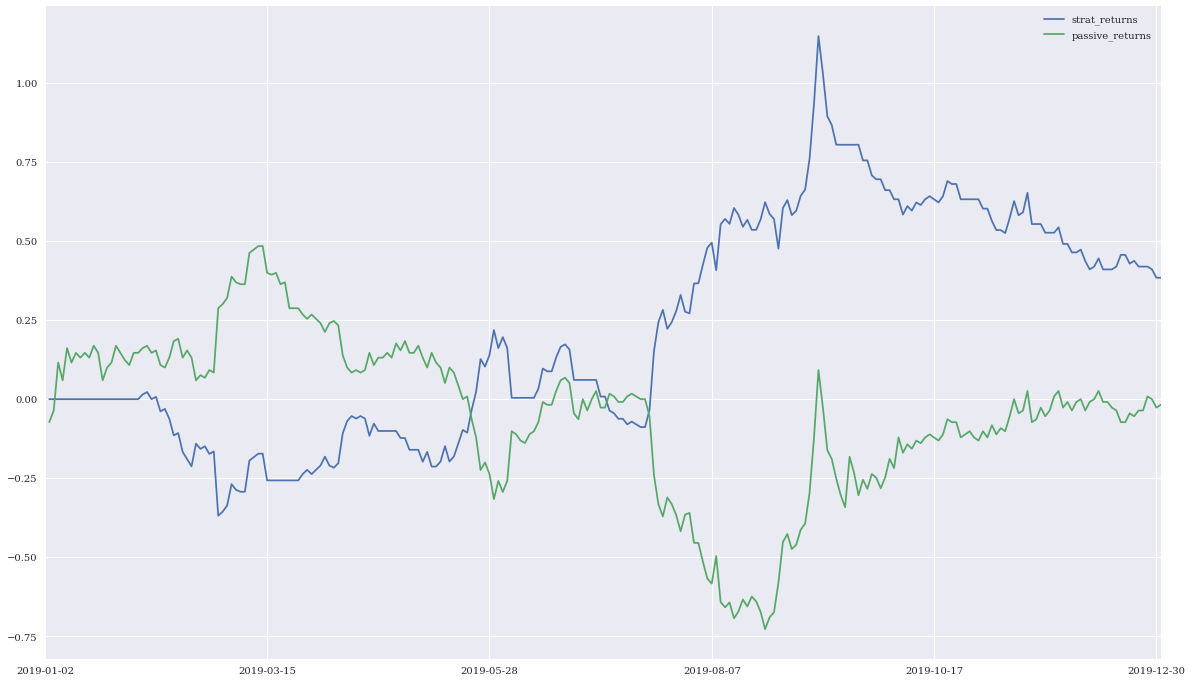

In [1130]:
strat_plot = pd.DataFrame([df['strat_returns'], df['passive_returns']])
strat_plot = strat_plot.transpose()
strat_plot.plot(figsize=(20,12))

In [1121]:
# TODO - Build total portfolio return function - no reason to go further until I see how this all wins over a collection
INITIAL_BET = 10000
PORTFOLIO_PROFIT = 0
returns = []
for total_return in returns:
    PORTFOLIO_PROFIT += (total_return + 1) * INITIAL_BET # etc.

In [856]:
# Consider regime switching for what strat to run